In [1]:
!pip install kaggle

In [2]:
# Creating the .kaggle directory
!mkdir -p ~/.kaggle

# Copying the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Setting the correct permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Importing the path of kaggle.json file

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:01<00:00, 98.5MB/s]
100% 163M/163M [00:01<00:00, 96.9MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


#**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2465.jpg', 'with_mask_3039.jpg', 'with_mask_2162.jpg', 'with_mask_2802.jpg', 'with_mask_3611.jpg']
['with_mask_698.jpg', 'with_mask_1997.jpg', 'with_mask_569.jpg', 'with_mask_2725.jpg', 'with_mask_3449.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3806.jpg', 'without_mask_149.jpg', 'without_mask_816.jpg', 'without_mask_591.jpg', 'without_mask_985.jpg']
['without_mask_1774.jpg', 'without_mask_870.jpg', 'without_mask_600.jpg', 'without_mask_3472.jpg', 'without_mask_1793.jpg']


In [9]:
print('Number of mask images:', len(with_mask_files) )
print('Number of without mask images:', len(without_mask_files) )

Number of mask images: 3725
Number of without mask images: 3828


#**Creating Labels for the two class of Images**

with mask--> 1

without mask -->0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0] * 3825

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3825


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7550
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#**Displaying the Images**

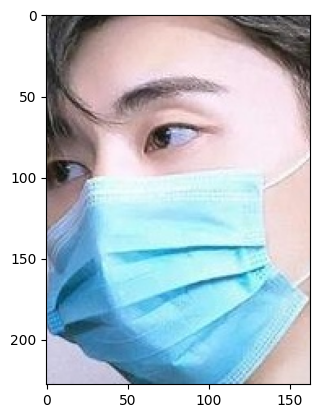

In [14]:
# displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

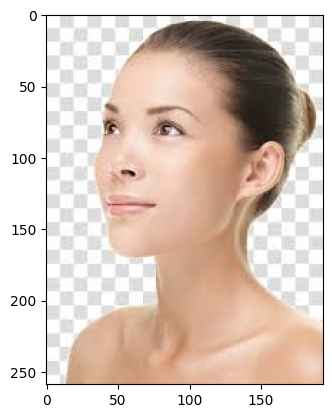

In [15]:
# displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

#**Image Processing**

1. Resize the Images
2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[204, 204, 216],
        [204, 204, 216],
        [202, 202, 214],
        ...,
        [211, 211, 219],
        [211, 211, 220],
        [208, 208, 220]],

       [[206, 206, 218],
        [206, 206, 218],
        [204, 204, 216],
        ...,
        [205, 205, 214],
        [208, 208, 217],
        [207, 207, 218]],

       [[210, 210, 222],
        [209, 209, 221],
        [208, 208, 220],
        ...,
        [197, 198, 205],
        [200, 201, 209],
        [203, 203, 212]],

       ...,

       [[147, 154,  97],
        [147, 156,  98],
        [145, 158, 100],
        ...,
        [ 24,  26,  33],
        [ 34,  34,  41],
        [ 35,  36,  38]],

       [[141, 149,  93],
        [143, 152,  95],
        [146, 156,  99],
        ...,
        [ 26,  27,  31],
        [ 38,  37,  42],
        [ 38,  40,  40]],

       [[133, 143,  88],
        [140, 147,  93],
        [148, 154, 100],
        ...,
        [ 32,  31,  30],
        [ 37,  36,  35],
        [ 39,  39,  37]]], dtype=uint8)
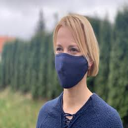

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and lable list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7550,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


#**Train Test Split**

In [27]:
import numpy as np

# Convert Y to a numpy array if it's not already
Y = np.array(Y)

# Ensure X and Y have consistent lengths
num_samples_X = X.shape[0]
num_samples_Y = Y.shape[0]

if num_samples_X != num_samples_Y:
    # Determine the number of samples to remove from X
    num_to_remove = num_samples_X - num_samples_Y

    # Create an index array to remove the last 'num_to_remove' samples
    indices_to_keep = np.arange(num_samples_X - num_to_remove)

    # Slice X and Y to keep only the indices that match
    X_cleaned = X[indices_to_keep]
    Y_cleaned = Y[indices_to_keep]

    print(f"Removed {num_to_remove} samples from X and Y to match their lengths.")
else:
    X_cleaned = X
    Y_cleaned = Y
    print("X and Y already have matching lengths.")

# Now X_cleaned and Y_cleaned should have the same number of samples
print("Shape of X_cleaned:", X_cleaned.shape)
print("Shape of Y_cleaned:", Y_cleaned.shape)


Removed 3 samples from X and Y to match their lengths.
Shape of X_cleaned: (7550, 128, 128, 3)
Shape of Y_cleaned: (7550,)


In [28]:
X = X_cleaned
Y = Y_cleaned

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7550, 128, 128, 3) (6040, 128, 128, 3) (1510, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[45, 50, 52],
        [44, 49, 52],
        [44, 49, 52],
        ...,
        [27, 35, 38],
        [29, 37, 40],
        [30, 38, 41]],

       [[37, 42, 46],
        [38, 43, 46],
        [40, 45, 48],
        ...,
        [27, 35, 38],
        [29, 37, 40],
        [29, 37, 40]],

       [[35, 40, 44],
        [35, 40, 45],
        [37, 42, 45],
        ...,
        [28, 36, 39],
        [28, 36, 39],
        [28, 36, 39]],

       ...,

       [[13, 13, 11],
        [14, 14, 12],
        [14, 14, 12],
        ...,
        [36, 36, 34],
        [34, 34, 32],
        [28, 28, 26]],

       [[14, 14, 12],
        [14, 14, 12],
        [15, 15, 13],
        ...,
        [38, 38, 36],
        [33, 33, 31],
        [27, 27, 25]],

       [[14, 14, 12],
        [14, 14, 12],
        [15, 15, 13],
        ...,
        [37, 37, 35],
        [31, 31, 29],
        [27, 27, 25]]], dtype=uint8)
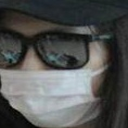

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.17647059, 0.19607843, 0.20392157],
        [0.17254902, 0.19215686, 0.20392157],
        [0.17254902, 0.19215686, 0.20392157],
        ...,
        [0.10588235, 0.1372549 , 0.14901961],
        [0.11372549, 0.14509804, 0.15686275],
        [0.11764706, 0.14901961, 0.16078431]],

       [[0.14509804, 0.16470588, 0.18039216],
        [0.14901961, 0.16862745, 0.18039216],
        [0.15686275, 0.17647059, 0.18823529],
        ...,
        [0.10588235, 0.1372549 , 0.14901961],
        [0.11372549, 0.14509804, 0.15686275],
        [0.11372549, 0.14509804, 0.15686275]],

       [[0.1372549 , 0.15686275, 0.17254902],
        [0.1372549 , 0.15686275, 0.17647059],
        [0.14509804, 0.16470588, 0.17647059],
        ...,
        [0.10980392, 0.14117647, 0.15294118],
        [0.10980392, 0.14117647, 0.15294118],
        [0.10980392, 0.14117647, 0.15294118]],

       ...,

       [[0.05098039, 0.05098039, 0.04313725],
        [0.05490196, 0.05490196, 0.04705882],
        [0.05490196, 0

#**Building a Convolutional Neural Network(CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compile the neural network
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['acc'])

#**Training the Neural Nework**

In [37]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - acc: 0.6799 - loss: 0.8232 - val_acc: 0.8907 - val_loss: 0.2965
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 179s 869ms/step - acc: 0.8672 - loss: 0.3271 - val_acc: 0.9106 - val_loss: 0.2110
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 855ms/step - acc: 0.9018 - loss: 0.2646 - val_acc: 0.8907 - val_loss: 0.2538
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 197s 822ms/step - acc: 0.9066 - loss: 0.2402 - val_acc: 0.9106 - val_loss: 0.1955
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 838ms/step - acc: 0.9222 - loss: 0.1825 - val_acc: 0.9255 - val_loss: 0.1779


#**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)
print('Loss=', loss)

48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - acc: 0.9355 - loss: 0.1837
Test Accuracy= 0.9271523356437683
Loss= 0.19433987140655518


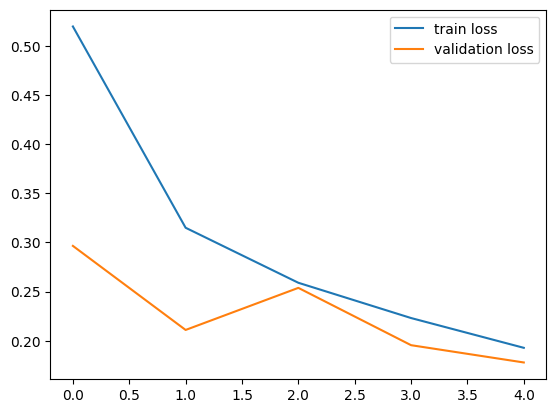

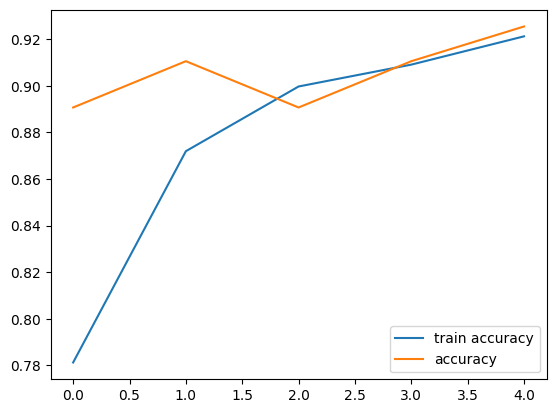

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/business-woman-wearing-a-mask-f1.jpg


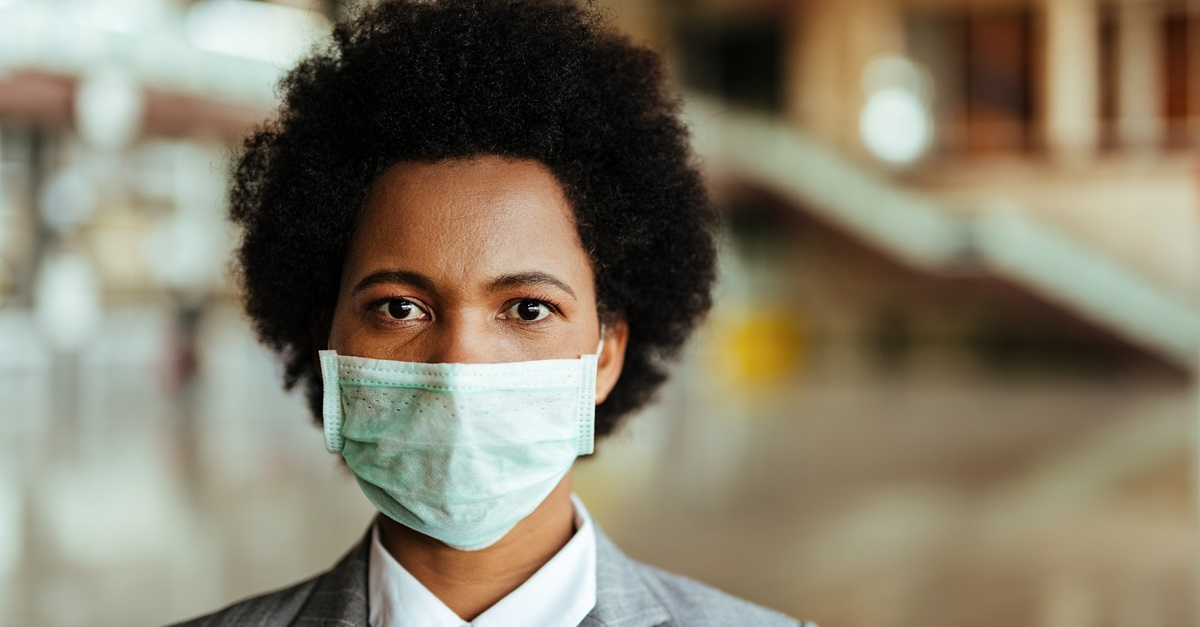

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.26664358 0.7120373 ]]
1
The person in the image is wearing a mask


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')